## LAGGED CORRELATION

In [1]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
import xarray as xr
import cmocean
import pylab as pl
from math import radians, cos, sin, asin, sqrt
import scipy.signal as sig
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
pathETA='/media/amelia/Trillian/SVB/ETA.nc'
dsETA= xr.open_dataset(pathETA)
pathVEL='/media/amelia/Trillian/SVB/coastVEL.nc'
dsVEL= xr.open_dataset(pathVEL)
dswAC= xr.open_dataset("/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/ETAwithSVBACall.nc")

In [3]:
eta=dsETA.ETAfiltcoast.values
distETA=dsETA.dist.values
WVEL=dsVEL.Wfilt.values
dist=dsVEL.dist.values
lat_acVEL=dsVEL.lat_ac.values
lon_acVEL=dsVEL.lon_ac.values

In [4]:
varname='PHIHYD'
i=0
pathn='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01b_noSVB_febTS/'+ str(varname)+'noSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
pathw='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01b_SVB_febTS/'+ str(varname)+'withSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
        
dsw  = xr.open_dataset(pathw)
dsn = xr.open_dataset(pathn)

In [5]:
LAT=dsw.YC
LON=dsw.XC-360
Z = dsw.Z
hFacC = dsw.hFacC

hfa = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfa)
        
depth=dsw.Depth
depthno=dsn.Depth

TIME=dsVEL.time.values

In [6]:
colors=[ '#4daf4a', '#a65628', '#984ea3',
                   '#e41a1c', '#dede00','#377eb8'
       ,'#ff7f00','#f781bf','#999999']

In [7]:
params = {'font.size': 16,
          'figure.figsize': (12, 8),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

0.8333333333333334
1.6111111111111112
2.861111111111111


Text(0, 0.5, 'Correlation Coefficient')

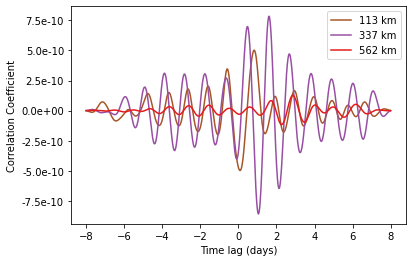

In [10]:
xlab='Lag'
ylab='Correlation'
fig,ax=plt.subplots()
ind=[index*1,index*3,index*5,index*7]
put=[0*1, 2*1, 4*1]
p=0
for i in put:
    p=p+1
    ax.plot(((lags[i,:]*20))/(60*24),out[i,:],color=colors[p],label=f'{dist[ind[p-1]]:.0f} km')
    print((lag[i]*20)/(60*24))

ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
ax.legend()
    
ax.set_xlabel('Time lag (days)')
ax.set_ylabel('Correlation Coefficient')

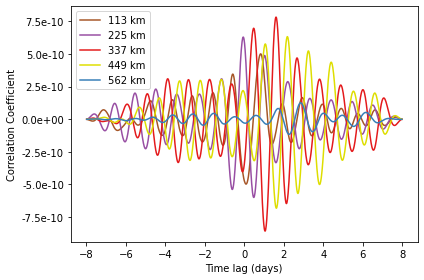

In [9]:
lag=np.zeros(7)
lags=np.zeros((7,len(WVEL[:,1])*2-1))
out=np.zeros((7,len(WVEL[:,1])*2-1))
p=0

xlab='Lag'
ylab='Correlation'
fig,ax=plt.subplots()

for i in np.arange(1,6,1):
    p=p+1
    index=60
    in1=WVEL[:,0]
    in2=WVEL[:,index*i]
    outi=sig.correlate(in2, in1)
    lagi = sig.correlation_lags(in2.size, in1.size)
    lag[p-1] = lagi[np.argmax(outi)]
    lags[p-1,:]=lagi
    out[p-1,:]=outi
    
    ax.plot(((lags[p-1,:]*20))/(60*24),out[p-1,:],color=colors[i],label=f'{dist[index*i]:.0f} km')

    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    ax.legend()
    
    ax.set_xlabel('Time lag (days)')
    ax.set_ylabel('Correlation Coefficient')
    
    #ax.set_xlim(0, 8)
    #ax.set_ylim(27,35.3)
    
fig.tight_layout()

In [74]:
ind=[index*1,index*2,index*3,index*4,index*5,index*6,index*7]
c=-((dist[0]-dist[ind])*1000)/(lag.astype(int)*20*60)

In [10]:
((dist[0]-dist[107])*1000)/((TIME[lag[0].astype(int)]-2880)*60)

-0.29682553543899054

In [75]:
c

array([  1.54940283, -46.53052846,   2.40874209,   2.3750199 ,
         2.26480756,          inf,          inf])

In [76]:
(lag*20)/(60*24)

array([ 0.83333333, -0.05555556,  1.61111111,  2.18055556,  2.86111111,
        0.        ,  0.        ])

In [30]:
((TIME[lag[1].astype(int)]-2880)*60)

475200.0

In [35]:
c

array([-9.76032202,  1.84652362,  1.6987017 ,  1.49378645,  1.74374899])

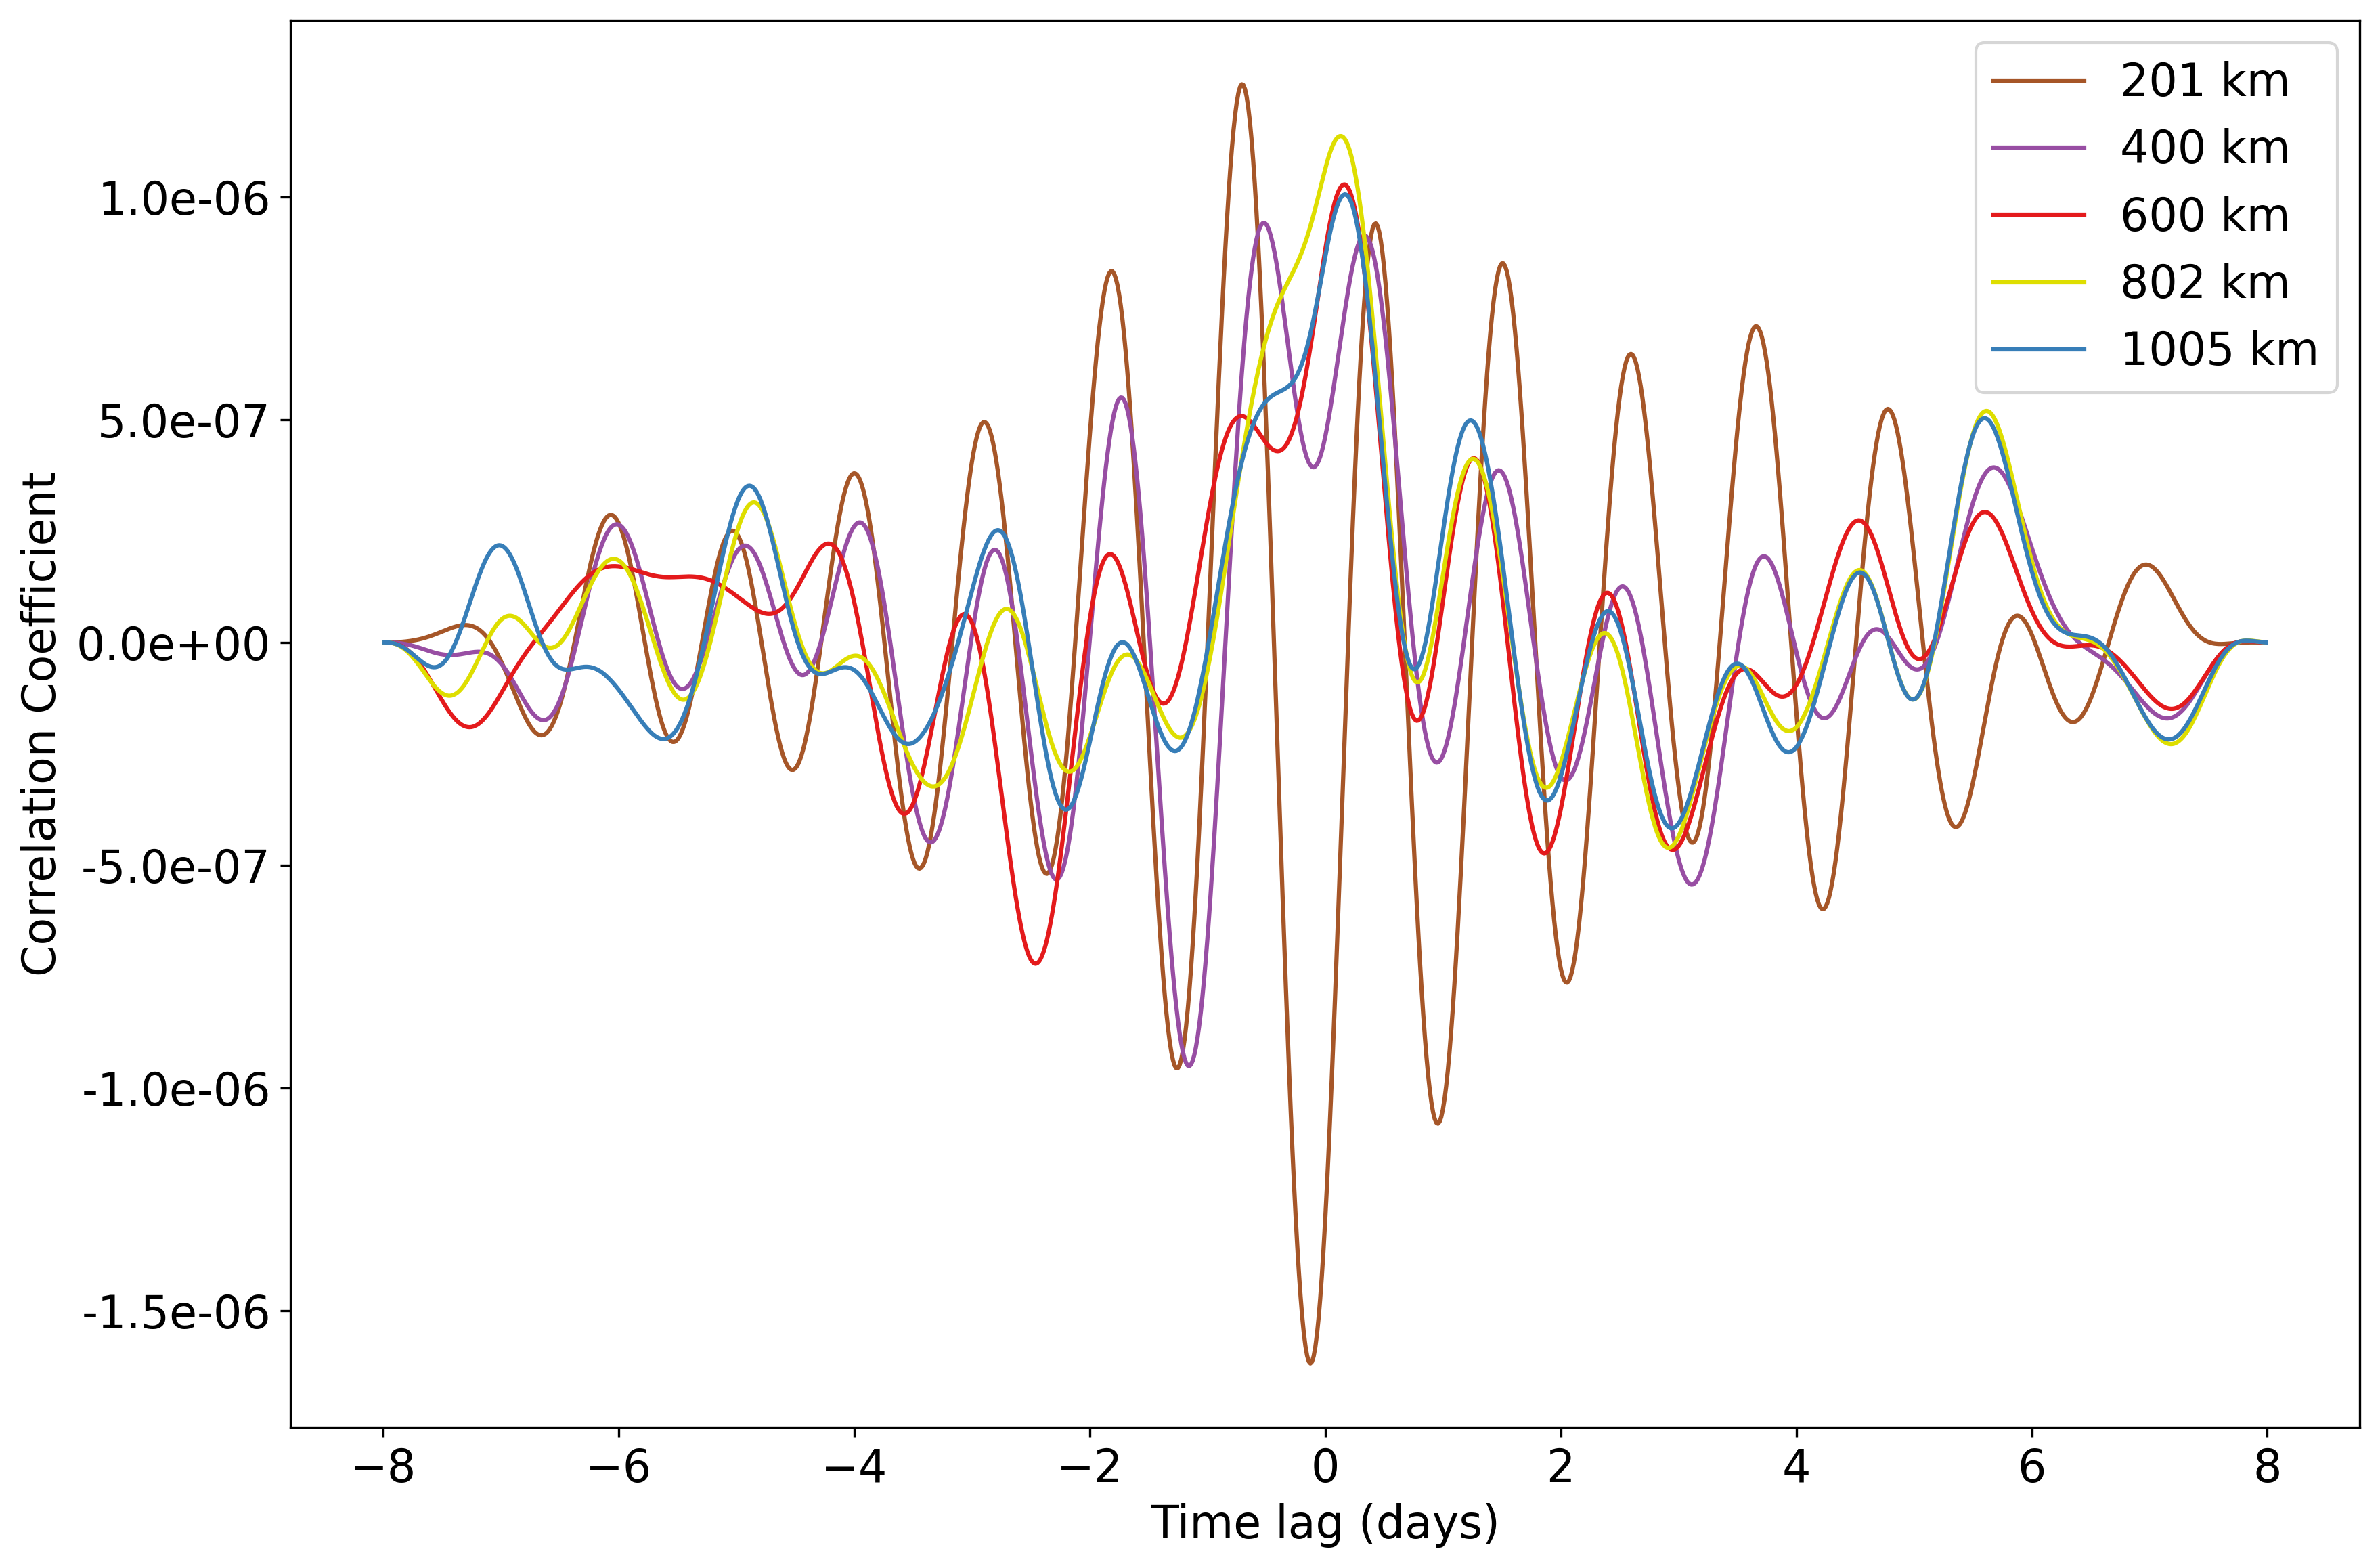

In [11]:
lag=np.zeros(5)
lags=np.zeros((5,len(eta[:,1])*2-1))
out=np.zeros((5,len(eta[:,1])*2-1))
p=0

xlab='Lag'
ylab='Correlation'
fig,ax=plt.subplots()

for i in np.arange(1,6,1):
    p=p+1
    index=107
    in1=eta[:,0]
    in2=eta[:,index*i]
    outi=sig.correlate(in1, in2)
    lagi = sig.correlation_lags(in1.size, in2.size)
    lag[p-1] = lagi[np.argmax(outi)]
    lags[p-1,:]=lagi
    out[p-1,:]=outi
    
    ax.plot(((lags[p-1,:]*20))/(60*24),out[p-1,:],color=colors[i],label=f'{distETA[index*i]:.0f} km')

    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    ax.legend()
    
    ax.set_xlabel('Time lag (days)')
    ax.set_ylabel('Correlation Coefficient')
    
    #ax.set_xlim(0, 8)
    #ax.set_ylim(27,35.3)
    
fig.tight_layout()

In [13]:
index=[107*1,107*2,107*3,107*4,107*5]
c=-((distETA[0]-distETA[index])*1000)/((TIME[lag.astype(int)]-2880)*60)

In [14]:
c

array([ 0.31555719,  0.61572879, 41.55855378, 74.06590203, 69.63596889])